In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3, ResNet50, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import os


In [ ]:
# Define paths (modify based on your Drive location)
dataset_path = "/content/drive/MyDrive/drishtiimage"

train_dir = os.path.join(dataset_path, "/content/drive/MyDrive/drishtiimage/archive/Training-20211018T055246Z-001")
test_dir = os.path.join(dataset_path, "/content/drive/MyDrive/drishtiimage/archive/Test-20211018T060000Z-001")

# Image size & batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only normalization for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Load test dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 150 images belonging to 1 classes.


In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3, ResNet50, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Choose pre-trained model: EfficientNet, ResNet, or DenseNet
def get_model(model_name="EfficientNet"):
    if model_name == "EfficientNet":
        base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    elif model_name == "ResNet":
        base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    elif model_name == "DenseNet":
        base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    else:
        raise ValueError("Invalid model name. Choose from EfficientNet, ResNet, or DenseNet.")

    # Ensure the model is properly connected
    base_model.trainable = False  # Freeze the base model
    inputs = tf.keras.Input(shape=(224, 224, 3))  # Explicit input layer
    x = base_model(inputs, training=False)  # Ensure it runs in inference mode
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification

    # Create the final model
    model = Model(inputs, outputs)

    return model

# Load EfficientNet by default
model = get_model("EfficientNet")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb3 (Functional)          │ (None, 7, 7, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,177,264 (42.64 MB)

 Trainable params: 393,729 (1.50 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [ ]:
EPOCHS = 200

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)


NameError: name 'model' is not defined

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 1.0000 - loss: 3.0666e-10
Test Accuracy: 100.00%


In [ ]:
model.save("/content/drive/MyDrive/glaucoma_model.h5")


In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Get the image path
image_path = list(uploaded.keys())[0]
print("Uploaded Image Path:", image_path)


Saving drishtiGS_085.png to drishtiGS_085.png
Uploaded Image Path: drishtiGS_085.png


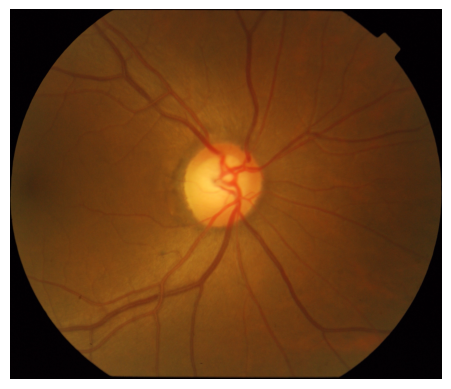

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize (same as training)
    return img_array

# Preprocess the uploaded image
img_array = preprocess_image(image_path)

# Display the image
plt.imshow(image.load_img(image_path))
plt.axis("off")
plt.show()


In [ ]:
# Get the prediction
prediction = model.predict(img_array)

# Convert probability to class
threshold = 0.5  # Adjust based on dataset
if prediction < threshold:
    print("🔵 Prediction: NORMAL (No Glaucoma)")
else:
    print("🔴 Prediction: GLAUCOMA Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
🔵 Prediction: NORMAL (No Glaucoma)


In [ ]:
model.save("/content/drive/MyDrive/glaucoma_densenet_model.h5")


In [ ]:
model.save()

Saving drishtiGS_016.png to drishtiGS_016.png


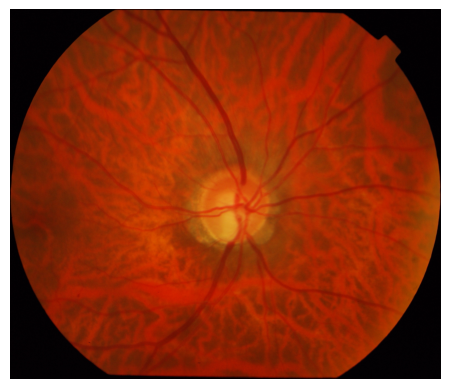

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Prediction Score: 0.0000 → 🔵 NORMAL (No Glaucoma)


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing import image
from google.colab import files

# Function to create DenseNet121 model
def get_densenet_model():
    base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze DenseNet layers

    # Custom classification layers
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    output_layer = Dense(1, activation='sigmoid')(x)  # Binary classification (glaucoma or normal)

    model = Model(inputs=base_model.input, outputs=output_layer)
    return model

# Load trained DenseNet121 model
model = load_model("/content/drive/MyDrive/glaucoma_densenet_model.h5")  # Update with your saved model path

# Upload and test an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get uploaded file name

# Display uploaded image
plt.imshow(image.load_img(image_path))
plt.axis("off")
plt.show()

# Preprocess image for DenseNet121
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Predict if the image has glaucoma or not
img_array = preprocess_image(image_path)
prediction = model.predict(img_array)

# Classify based on threshold
threshold = 0.5
result = "🔴 GLAUCOMA Detected" if prediction >= threshold else "🔵 NORMAL (No Glaucoma)"
print(f"Prediction Score: {prediction[0][0]:.4f} → {result}")
